

# Data Exploration for UEBA Risk Scoring
This notebook provides an exploratory analysis of the dataset used for Risk Scoring in the UEBA system. The goal is to understand the dataset structure, identify any data quality issues, and gain initial insights into patterns relevant to user behavior.

### 1. Import Libraries and Load Dataset
We start by importing the necessary libraries and loading the dataset.

In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset with ISO-8859-1 encoding to avoid decoding errors
file_path = r'C:\Users\USER\UEBA_Project\risk_scoring\data\raw\train_data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
data.head()


,id,account,group,IP,url,port,vlan,switchIP,time,ret
0,1,xiaojiawei@qq.com,ÈËÊÂÐÐÕþÖÐÐÄ,192.168.1.50,http://123.6.4.41,15788,700,129.30.06.37,2021/6/16 7:56,0.1149
1,2,xiaojiawei@qq.com,ÈËÊÂÐÐÕþÖÐÐÄ,192.168.31.46,http://104.192.108.154,12665,700,152.91.89.45,2021/6/28 7:58,0.1801
2,3,xiaojiawei@qq.com,ÈËÊÂÐÐÕþÖÐÐÄ,192.168.2.3,http://42.236.37.80,25551,700,129.30.06.37,2021/6/1 6:37,0.3690
3,4,xiaojiawei@qq.com,ÈËÊÂÐÐÕþÖÐÐÄ,192.168.145.30,http://uf-api6-client.ksord.com,18274,700,162.6.8.29,2021/5/5 8:18,0.1532
4,5,xiaojiawei@qq.com,ÈËÊÂÐÐÕþÖÐÐÄ,192.168.178.92,http://101.199.128.170,34572,700,162.0.1.84,2021/6/20 6:52,0.1449


### 2. Basic Information and Structure
#### **Data Types and Info**
The info() method gives us an overview of the data types for each column, the number of non-null entries, and memory usage. This helps in understanding the structure and completeness of the dataset.

In [4]:
# Check data types and general information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528690 entries, 0 to 528689
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        528690 non-null  int64  
 1   account   528690 non-null  object 
 2   group     528690 non-null  object 
 3   IP        528690 non-null  object 
 4   url       528690 non-null  object 
 5   port      528690 non-null  int64  
 6   vlan      528690 non-null  int64  
 7   switchIP  528690 non-null  object 
 8   time      528690 non-null  object 
 9   ret       528690 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 40.3+ MB


#### First 5 Rows of the Dataset
To get a feel for the data's content, here are the first five rows:

In [5]:
# Display the first five rows of the dataset
data.head()


,id,account,group,IP,url,port,vlan,switchIP,time,ret
0,1,xiaojiawei@qq.com,ÈËÊÂÐÐÕþÖÐÐÄ,192.168.1.50,http://123.6.4.41,15788,700,129.30.06.37,2021/6/16 7:56,0.1149
1,2,xiaojiawei@qq.com,ÈËÊÂÐÐÕþÖÐÐÄ,192.168.31.46,http://104.192.108.154,12665,700,152.91.89.45,2021/6/28 7:58,0.1801
2,3,xiaojiawei@qq.com,ÈËÊÂÐÐÕþÖÐÐÄ,192.168.2.3,http://42.236.37.80,25551,700,129.30.06.37,2021/6/1 6:37,0.3690
3,4,xiaojiawei@qq.com,ÈËÊÂÐÐÕþÖÐÐÄ,192.168.145.30,http://uf-api6-client.ksord.com,18274,700,162.6.8.29,2021/5/5 8:18,0.1532
4,5,xiaojiawei@qq.com,ÈËÊÂÐÐÕþÖÐÐÄ,192.168.178.92,http://101.199.128.170,34572,700,162.0.1.84,2021/6/20 6:52,0.1449


#### Missing Values
Checking for missing values helps identify if any columns require data cleaning.

In [6]:
# Check for missing values in each column
data.isnull().sum()


id          0
account     0
group       0
IP          0
url         0
port        0
vlan        0
switchIP    0
time        0
ret         0
dtype: int64

### 3. Summary Statistics
To understand the distribution of numerical columns, we use describe() to get basic statistics like mean, standard deviation, and percentiles.

In [7]:
# Summary statistics for numerical columns
data.describe()


,id,port,vlan,ret
count,528690.000000,528690.000000,528690.000000,528690.000000
mean,264345.500000,25241.669929,1152.486902,0.257757
std,152619.801246,8543.017235,438.932786,0.219326
min,1.000000,11122.000000,700.000000,0.000100
25%,132173.250000,16865.000000,900.000000,0.078500
50%,264345.500000,25278.000000,1000.000000,0.208000
75%,396517.750000,33474.000000,1200.000000,0.377400
max,528690.000000,38867.000000,2000.000000,1.000000


### 4. Unique Values in Categorical Columns

In [8]:
# Check unique values for each column
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


id: 528690 unique values
account: 151 unique values
group: 7 unique values
IP: 133 unique values
url: 1319 unique values
port: 1320 unique values
vlan: 7 unique values
switchIP: 133 unique values
time: 57478 unique values
ret: 9987 unique values


### 5. Time-based Analysis

In [9]:
# Convert the time column to datetime format and check for any time-based patterns
data['time'] = pd.to_datetime(data['time'], errors='coerce')  # Coerce errors to handle any parsing issues

# Display the first five rows again to confirm conversion
data[['time']].head()

# Extract hour information and analyze for peak login times
data['hour'] = data['time'].dt.hour
data['hour'].value_counts().sort_index()


hour
0     32887
1     42326
2     38024
3     29394
4     38329
5     44585
6     51453
7     59154
8     40360
9     43850
10    38907
11    37100
12    10367
13     4641
14     2827
15     2308
18      446
19      557
20      855
21     1094
22     1223
23     8003
Name: count, dtype: int64

### 6. Visualizations
#### 6.1 Distribution of Risk Scores (ret Column)
This plot shows the distribution of risk scores, which helps us understand the typical values and detect outliers.

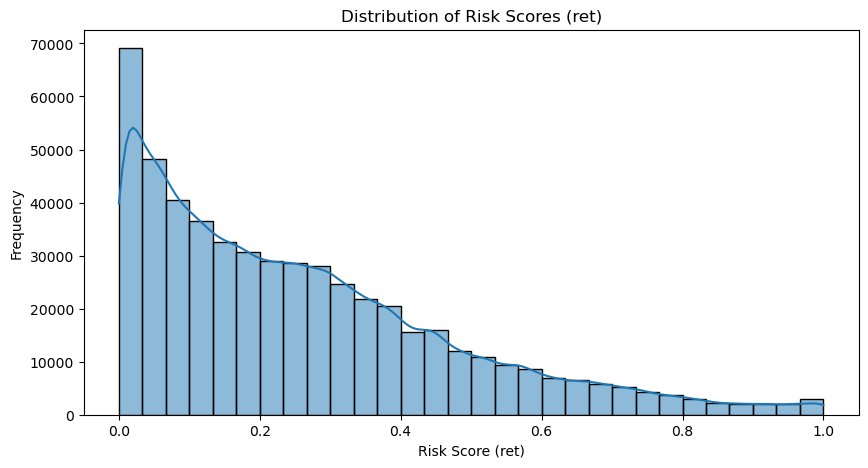

In [13]:
# Plot the distribution of the 'ret' column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data['ret'], kde=True, bins=30)
plt.title('Distribution of Risk Scores (ret)')
plt.xlabel('Risk Score (ret)')
plt.ylabel('Frequency')
plt.show()


#### 6.2 Login Frequency by Hour
Visualizing login frequency by hour can reveal peak times for user logins, which may be useful for detecting unusual patterns.

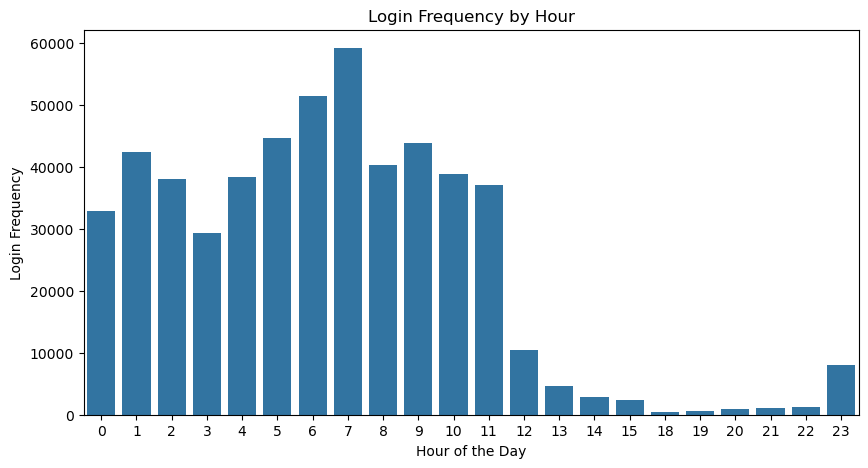

In [14]:
# Plot login frequency by hour
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=data)
plt.title('Login Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Login Frequency')
plt.show()


#### 6.3 Top 10 Most Frequent IP Addresses
Identifying the most common IP addresses helps understand common access points and may reveal suspicious or overly active IPs.

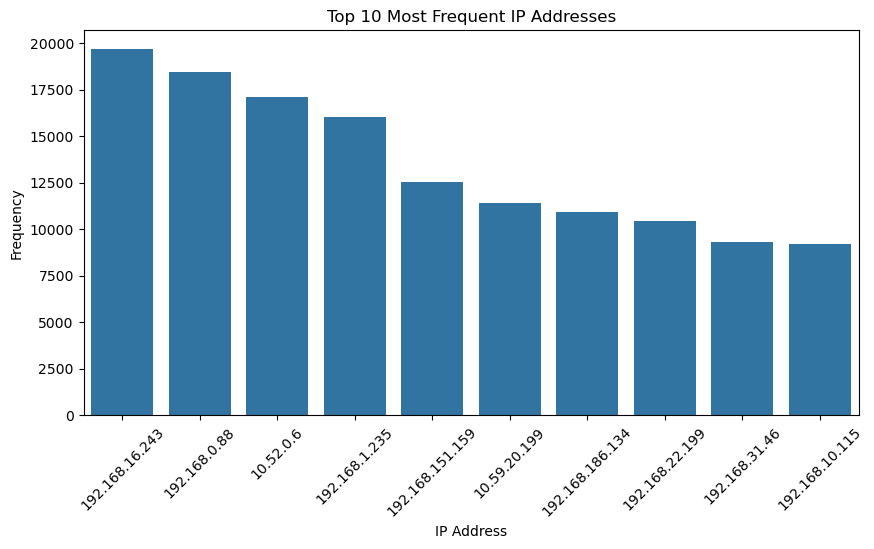

In [15]:
# Plot the top 10 most frequent IP addresses
top_ips = data['IP'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_ips.index, y=top_ips.values)
plt.title('Top 10 Most Frequent IP Addresses')
plt.xlabel('IP Address')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#### 6.4 Port Usage Analysis
This plot shows the distribution of ports, highlighting commonly used ones, which could indicate specific services or access patterns.

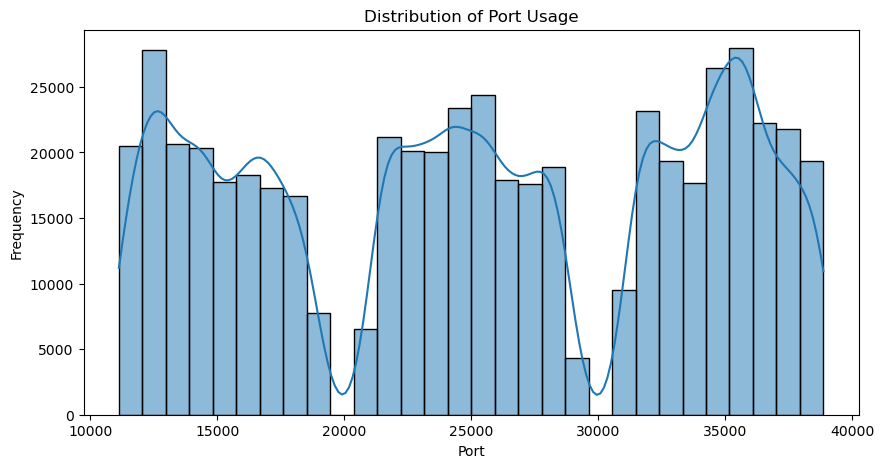

In [16]:
# Plot distribution of port usage
plt.figure(figsize=(10, 5))
sns.histplot(data['port'], kde=True, bins=30)
plt.title('Distribution of Port Usage')
plt.xlabel('Port')
plt.ylabel('Frequency')
plt.show()


#### 6.5 VLAN Distribution
Visualizing the VLAN distribution can help identify which VLANs are most commonly used, providing insights into network segmentation.

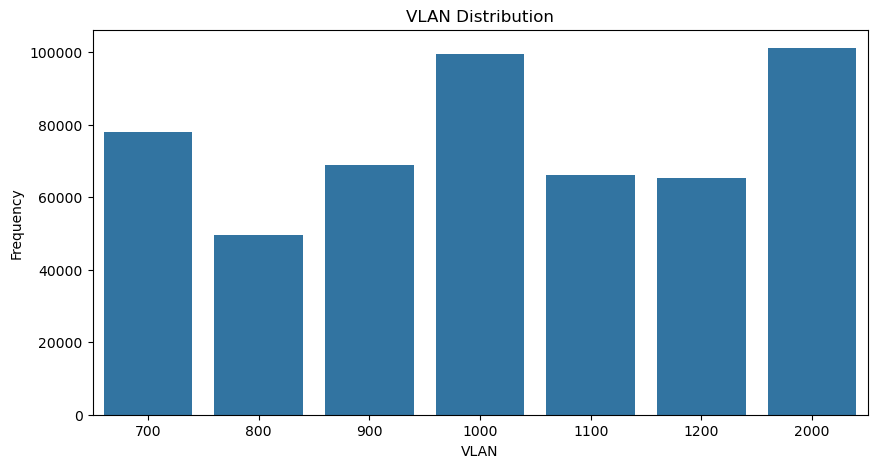

In [17]:
# Plot the distribution of VLANs
plt.figure(figsize=(10, 5))
sns.countplot(x='vlan', data=data)
plt.title('VLAN Distribution')
plt.xlabel('VLAN')
plt.ylabel('Frequency')
plt.show()


In [ ]:
file_path = r"C:\Users\USER\UEBA_Project\anomaly_detection\notebooks\1_data_exploration.ipynb" # 